# BayesLDM User Guide

# <a href="https://colab.research.google.com/github/reml-lab/BayesLDM/blob/main/Examples/BayesLDM_manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize Code

In [1]:
!pip install BayesLDM

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.2/300.2 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.9/174.9 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 KB 1.9 MB/s eta 0:00:00
  Created wheel for BayesLDM: filename=BayesLDM-1.0.9-py3-none-any.whl size=22081 sha256=80633d3ef4b0cd6af93f2784550d74aaae30e6ff0162e604a254796f8282df9b
  Stored in directory: /root/.cache/pip/wheels/55/65/41/3017a3b0760c4ce5a99a4c66431bbebcf3dca52c46f9f0508b
Successfully built BayesLDM


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import BayesLDM.BayesLDM as BayesLDM
import BayesLDM.utils as utils

# Section 1. Introduction

BayesLDM provides a domain specific probabilistic programming language that focuses on modeling multi-level data. Such data naturally arise in multiple health and social science domains where data sets contain time series data from multiple participants. BayesLDM is built on top of the NumPyro python package and enables the simplified specification of a wide range of probabilistic time series models. BayesLDM focuses on the application of Bayesian inference methods to infer posterior probability distributions over unknown model parameters. It can also automatically handle missing missing data using the same Bayesian inference approach and has the ability to simultaneously produce dustributions over missing data variables as well as over unknown model parameters. Relative to implementing models in Pyro itself, BayesLDM offers a number of optimizations to minimize inference run time, allowing users to focus on high-level modeling and not low-level implementation details. 

# Section 2. Defining Models with BayesLDM

As in other probabilistic programming languages including the NumPyro language that BayesLDM is based on, BayesLDM models are specified using programs that describe a probabilistic generative process. A BayesLDM program consists of a header section specifying properties of the program, followed by the body of the program consisting of a sequence of program statements. A program is specified as a string that is passed to an interpreter. Below we describe the structure of the header and the program body.

##2.1 BayesLDM Program Header Structure

The elements of the header section of a program are specified below.

```
ProgramName: [name] 
Indices: [index_name_1] [index_1_start] [index_1_end], ... , [index_name_N] [index_N_start] [index_N_end]
Inputs: [input_name_1] ... [input_name_J]
```

* **ProgameName**: This property allows for specifying a name for the program. The argument [name] can be any sequence of alphanumeric characters. No white space is permitted.

* **Indices**: In multi-level data sets, each level has a corresponding index variable. The indices property allows for declaring names and ranges of the index variables. Any number of index variables can be specified. Variables used as indices must be declared. 

* **Inputs**: The inputs property allows for declaring the names of fixed constants that can be used in a program. Any nuber of inputs can be specified. The values of input variables must be specified at the time that inference is run. If no inputs are required, this property can be ommitted.

## 2.2 BayesLDM Program Body Structure

The body of a BayesLDM program consists of a sequence of program statements. There are two types of program statements: assignemnt statements and sampling statements. Statements are constructed from numerical expressions and functions, which are in turn built from constants, variables and basic operators. To be valid, a BayesLDM program must contain at least one sampling statement.

### 2.2.1 Variables and Constants

BayesLDM supports floating point and integer constants. Floating point constants are numbers with a decimal point. Integer constants are numbers without a decimal point.

BayesLDM follows the same rules as Python for variable names. Variable names must start with an upper or lower case letter followed by a sequence of any alphanumeric characters. Variable names can contain underscores, but can not contain other punctuation characters or whitespace.

### 2.2.2 Operators

BayesLDM supports the basic arithmetic operations defined below. 

* Multiplication: *
* Division: /
* Addition: +
* Subtraction: -

For example, the expression below scales and shifts the variable $y$ using an expression composed only of basic arithmetic operations. 

```
5*y+1
```

### 2.2.3 Numerical Functions

BayesLDM can also leverage any numerical function imported from the JAX Numpy library. The JAX Numpy API is available here: https://jax.readthedocs.io/en/latest/jax.numpy.html. 

For example, assuming that the JAX Numpy library is imported as jnp, the statement below applies a log transform to the variable $y$. This expression will only be valid if $y$ is greater than $0$. 

```
jnp.log(y)
```

### 2.2.4 Numerical Expressions

A numerical expression is a variable, a constant, or any valid composition of variables and constants defined using arithmetic operations and numerical functions that evaluates to a numerical value. 

For example, assuming the variable $y$ is defined and JAX Numpy is imported as jnp, the expression below applies and log transform to $y$ and then scales and shifts the result.

```
5*jnp.log(y)+1
```




### 2.2.5 Assignment Statements

An assignment statement assigns a numerical value to a variable. The left hand side of the assignment statemnt must be a valid BayesLDM variable name. The right hand side must be a valid BayesLDM expression producing a numerical value. The basic structure of an assignment statement is shown below. The expression on the right hand side can reference any variables introduced on the left hand side of earlier lines in the program.

```
[variable name] = [expression]
```

Below, we show a basic example of assigning the constant 5 to the variable x.

```
x = 5
```

Assuming that the variable y is defined earlier in the program, the statement below assigns the value of the expression *5*y+1* to the variable $x$. 

```
x = 5*y+1
```

Assuming that the JAX Numpy library is imported as jnp and the variable $y$ is previously defined, the statement below assigns the value of the log transform of $y$ to the variable $x$. This expression will only be valid if y is a positive variable.

```
x = jnp.log(y)
```

### 2.2.6 Sampling Statements

A sampling statement specifies a probability distribution for a random variable. The left hand side of the must be a valid BayesLDM variable name. The right hand side must be a valid BayesLDM probability distribution expression. A probability distribtuon expression consists of a distribution name and BayesLDM expressions for each of the distribution's parmeters. The basic structure of a sampling statement is shown below. The expressions on the right hand side can reference any variables introduced on the left hand side of earlier lines in the program.

```
[variable name] ~ [Distribution Name]([expression1], ..., [expressionK])
```

BayesLDM supports the following probability distributions:

* Ber(p): The Bernoulli distribution on $\{0,1\}$ with $p\in[0,1]$ as the probability of 1. 
* Beta(a,b): The beta distribution on $[0,1]$ with parameters $a\geq 0$, $b\geq 0$.
* Exp(r): The exponential distribution on $[0,\infty)$ with rate parameter $r>0$.
* Gamma(c, r): The gamma distribution on $[0,\infty)$ with concentration parameter $c>0$ and rate parameter $r>0$.
* Poisson(r): The Poisson distribution on $0,1,2,...$ with rate parameter $r>=0$.
* N(m,s): The normal distribution on $(-\infty, \infty)$ with mean $m\in\mathbb{R}$ and standard deviation $s>0$.   
* StudentT(d): The student's t distribution on $(-\infty, \infty)$ with degree of freedom parameter $d>0$. 

**Example: Standard Normal Distribution.** In this example, we construct a standard normal distribution for the variable $x$ with the mean fixed at $0$ and the standard deviation fixed at $1$. We call the BayesLDM.compile() on the program text to construct the model. We then call model.sample() to draw samples from the model. Sampling from the model produces simulations from the generative model specified by the program.

In the call to model.sample(), a random seed is used to initialize the random number generator (by default n_seed=0. We can set n_seed=integer or chosen_rng_key=Jax random number). num_samples is the number of samples to draw. The output of running the program is the set of samples. Statistics on the samples are also shown. The default sampler used is the NumPyro "No U-Turn Sampler" (NUTS).

In [3]:
program = """
ProgramName: Normal
x ~ N(0,1)
"""

model = BayesLDM.compile(program) 
samples = model.sample(b_post_process=True)


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         x      0.02      1.00      0.02     -1.63      1.75    376.59      1.01

Number of divergences: 0


The output of the call to model.sample() is a Python distionary with one key for each variable defined through a sampling statement. We can perform any desired analysis on the output samples. In the example below, we plot a histogram of the samples of x using MatplotLib.

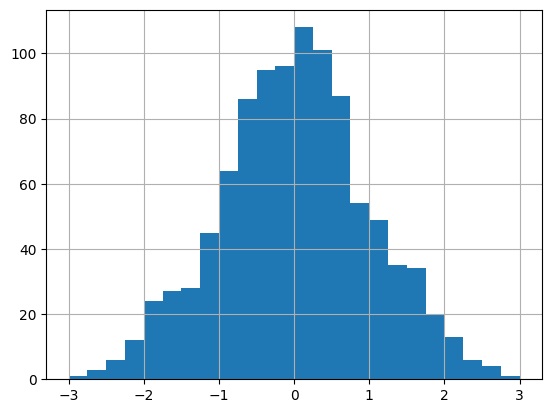

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(samples['x'],bins=np.arange(-3,3.25, 0.25));
plt.grid(True)

**Example: Discrete Normal Mixture.** In this example, we construct a discrete mixture distribution on x by generating a Bernoulli distribution on z and using it to select between two different means for a normal distribution on x. This results in a bimodal distribution on x with one mode for each conditional mean. We again draw samples and visualize them using a histogram.


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         x      0.11      1.10      0.37     -1.60      1.57     67.22      1.02

Number of divergences: 0


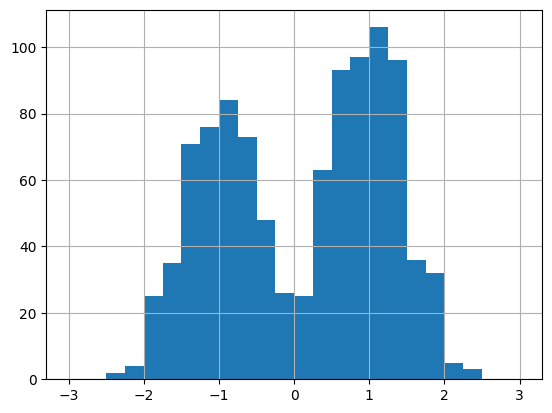

In [5]:
program = """
ProgramName: DiscreteNormalMixture

z ~ Ber(0.5)
x ~ N(2*z-1 ,0.5)

"""

model = BayesLDM.compile(program) 
samples = model.sample(b_post_process=True)
plt.hist(samples['x'],bins=np.arange(-3,3.25, .25));
plt.grid(True)

**Example: Scale Mixture.** In this example, we construct a scale mixture on x by generating an exponential distribution on the standard devation of a conditionally normally distributed variable x. We again draw samples and visualize them using a histogram. As we can see, this results in a distribution on x with significantly heavier tails than the N(0,1) distribution.


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         s      0.94      0.92      0.68      0.06      2.13     33.33      1.07
         x     -0.10      1.19     -0.02     -2.09      1.64    180.48      1.01

Number of divergences: 195


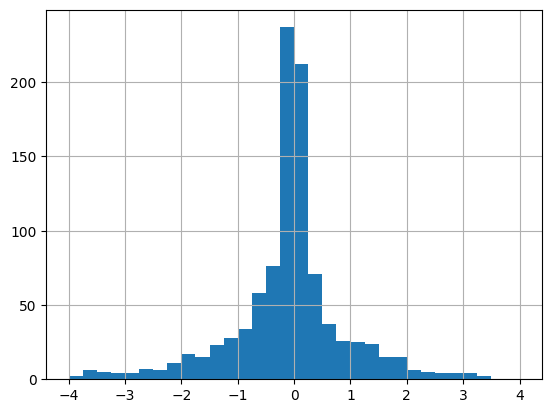

In [6]:
program = """
ProgramName: ScaleMixture

s ~ Exp(1)
x ~ N(0,s)

"""

model = BayesLDM.compile(program) 
samples = model.sample(b_post_process=True)
plt.hist(samples['x'],bins=np.arange(-4,4.25, .25));
plt.grid(True)

### 2.2.7 Using Single Index Variables

BayesLDM uses the concept of index variables to express replication in a model. To use an index variable, it must be specified in the program header along with an upper and lower range. The ranges must be non-negative integers. The index variables are used in BayesLDM programs following a syntax that matches that of standard Python arrays. Index variables can be used on both the right and left hand sides of sampling and assignment statements. We introduce the concept of indexing using an example program as shown below.

```
ProgramName: Example4
Indices: n 0 4

x[n] ~ N(0,1)
```

In this program, the variable n is declared to be an index variable with upper and lower limits 0 and 4. The variable x is indexed by n as indicated by the array syntax x[n] on the left hand side of the sampling statement. Conceptually, BayesLDM expands indexed expressions via a for loop over the specified index range. This program thus defines 5 different variables x[0] to x[4] that are identically distributed N(0,1). We provide a runnable version of the program below, including visualization of the samples for each of x[0] to x[4]. In practice, BayesLDM automatically applies optimizations to reduce run time when working with indexed variables. 


**Example: Basic Indexing.** Basic indexed sampling expression for defining multiple identically distributed variables. 


                mean       std    median      5.0%     95.0%     n_eff     r_hat
      x[0]      0.03      0.93     -0.02     -1.39      1.64   1398.66      1.00
      x[1]      0.04      1.01      0.02     -1.47      1.85   1175.77      1.00
      x[2]      0.01      0.99      0.04     -1.50      1.81   1088.78      1.00
      x[3]      0.05      0.97      0.04     -1.49      1.69   1071.38      1.00
      x[4]     -0.04      1.05     -0.04     -1.73      1.58   1387.41      1.00

Number of divergences: 0


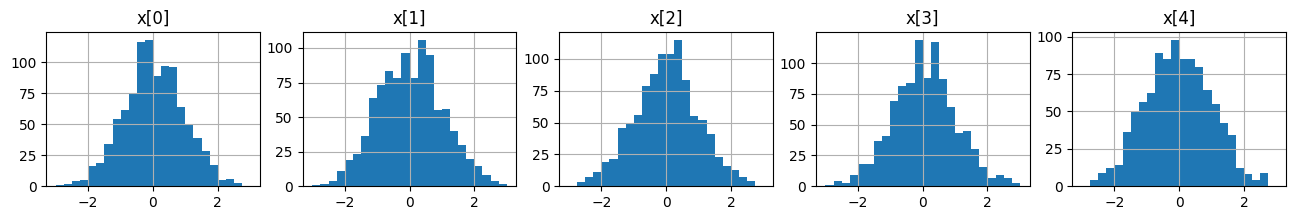

In [7]:
program = """
ProgramName: BasicIndexing
Indices: n 0 4

x[n] ~ N(0,1)
"""

model = BayesLDM.compile(program) 
samples = model.sample(b_post_process=True)

plt.figure(figsize=(16,2))
for n in range(5):
  plt.subplot(1,5,n+1)
  plt.hist(samples["x"][n],bins=np.arange(-3,3.25, .25));
  plt.grid(True)
  plt.title("x[%d]"%n)
plt.show()


**Example: Using Index Values in Distribution Parameter Expressions.** Importantly, indexing can be used on both the left and right hand side of sampling expressions. For example, the numerical values of index variables can be used on right hand side expressions within distributions. In the example below, we use an index variable t and let the mean of x[t] depend on t itself. We again use the index rang 0,...,4.  


                mean       std    median      5.0%     95.0%     n_eff     r_hat
      x[0]      0.02      0.96      0.01     -1.49      1.58   1202.13      1.00
      x[1]      0.99      1.00      0.97     -0.74      2.53   1442.45      1.00
      x[2]      1.98      1.01      1.96      0.42      3.73   1190.73      1.00
      x[3]      3.01      0.98      3.03      1.38      4.58   1104.75      1.00
      x[4]      4.00      1.00      4.01      2.48      5.81   1501.28      1.00

Number of divergences: 0


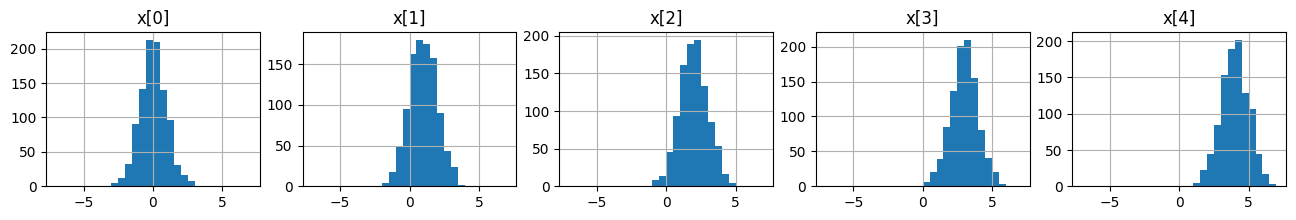

In [8]:
program = """
ProgramName: IndexedDistributions
Indices: t 0 4

x[t] ~ N(t,1)
"""

model = BayesLDM.compile(program) 
samples = model.sample(b_post_process=True)

plt.figure(figsize=(16,2))
for n in range(5):
  plt.subplot(1,5,n+1)
  plt.hist(samples["x"][n],bins=np.arange(-7,7.25, .5));
  plt.grid(True)
  plt.title("x[%d]"%n)
plt.show()

**Example: Basic Autoregressive Models.** BayesLDM can be used to specify autoregressive models using indexing in a very natural way. This requires specifying an unconditional distribution over the first time point, followed by a conditional distribution over each subsequent time point conditioned on the value of the previous time point. To provide this functionality, BayesLDM supports basic index aritmetic, as shown in the program below. This program specifies a Normal AR(1) process over 10 time points. We visualize the resulting sets of samples as  trajectories throguh time. 


                mean       std    median      5.0%     95.0%     n_eff     r_hat
      x[0]      0.08      0.98      0.11     -1.46      1.68    117.23      0.99
      x[1]      0.22      1.16      0.13     -1.73      2.10     72.16      1.03
      x[2]      0.09      1.18      0.09     -1.56      2.34     88.84      1.00
      x[3]      0.23      1.02      0.15     -1.45      1.84     82.92      1.01
      x[4]      0.09      0.98      0.13     -1.46      1.69     93.69      0.99
      x[5]      0.11      1.01      0.15     -1.50      1.56     56.56      1.00
      x[6]      0.05      1.06      0.17     -1.43      2.11     39.43      1.00
      x[7]     -0.06      1.22     -0.19     -1.81      2.09    100.50      1.06
      x[8]      0.06      1.04     -0.03     -1.70      1.54    108.02      1.11
      x[9]      0.02      1.20      0.15     -1.60      1.79    202.73      1.01

Number of divergences: 0


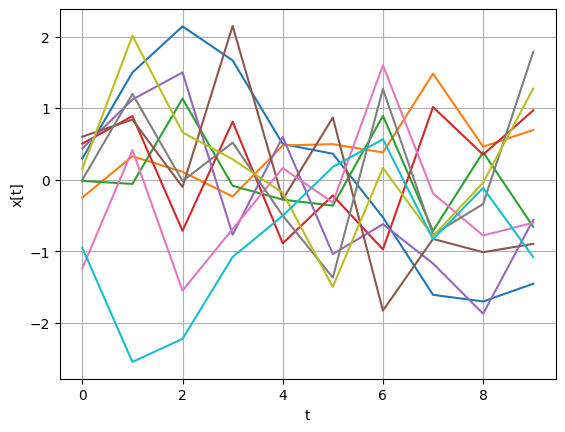

In [9]:
program = """
ProgramName: BasicAR
Indices: t 0 9

x[0] ~ N(0,1)
x[t] ~ N(0.5*x[t-1],1)
"""

model = BayesLDM.compile(program, n_level=1) 
samples = model.sample(num_samples=100, b_post_process=True)

for s in range(10):
  plt.plot(samples["x"][:,s])
plt.grid(True)
plt.xlabel("t")
plt.ylabel("x[t]")
plt.show()

**Example: Autoregressive Model with Multiple Indices.** BayesLDM also supports multiple indexing using standard Python syntax for multi-dimensional arrays. The program below defines a model over data cases n and time points t where each data case is defined by an AR(1) process. The mean of x[n,0] is chosen to be a function of n.


                mean       std    median      5.0%     95.0%     n_eff     r_hat
    x[0,0]      0.00      0.01     -0.00     -0.02      0.02   1682.88      1.00
    x[0,1]      0.00      1.01      0.01     -1.44      1.81    705.60      1.01
    x[0,2]     -0.03      1.34     -0.05     -2.24      2.12    527.85      1.00
    x[0,3]     -0.05      1.55     -0.02     -2.62      2.37    444.76      1.00
    x[0,4]     -0.05      1.73     -0.01     -2.85      2.83    436.35      1.01
    x[0,5]     -0.05      1.86     -0.03     -2.89      3.22    399.04      1.00
    x[0,6]     -0.10      1.97     -0.12     -3.52      2.78    395.73      1.00
    x[0,7]     -0.08      1.99     -0.09     -3.04      3.20    416.35      1.00
    x[0,8]     -0.09      2.02     -0.10     -3.23      3.26    485.84      1.00
    x[0,9]     -0.03      2.08      0.01     -3.14      3.62    562.07      1.00
    x[1,0]      3.00      0.01      3.00      2.98      3.02   1716.25      1.00
    x[1,1]      2.64      1

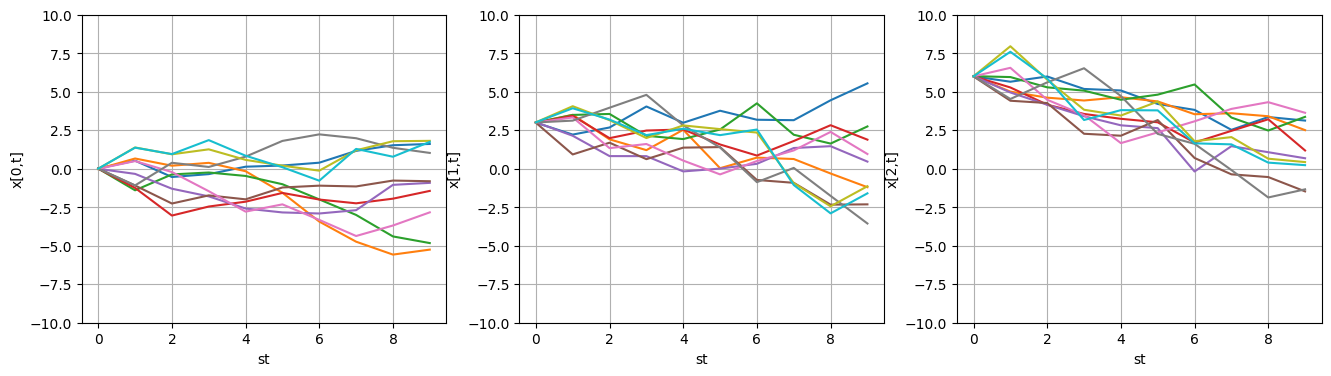

In [10]:
program = """
ProgramName: MultiIndexAR
Indices: n 0 2, t 0 9

x[n,0] ~ N(3*n,0.01)
x[n,t] ~ N(0.9*x[n,t-1],1)
"""

model = BayesLDM.compile(program) 
samples = model.sample(num_samples=1000, b_post_process=True)

plt.figure(figsize=(16,4))
for n in range(3):
  plt.subplot(1,3,n+1)
  for s in range(10):
    plt.plot(samples["x"][n,:,s]);
  plt.grid(True)
  plt.xlabel("st")
  plt.ylabel("x[%d,t]"%n)
  plt.ylim(-10,10)
plt.show()

# Section 3. Performing Inference with BayesLDM

An important feature of BayesLDM programs is that exactly the same BayesLDM program can be used for simulation and for inference. In the examples shown in Section 2, we used BayesLDM programs to construct generative models. We then used sampling to simulate realizations of the random varaibles that comprise the model. In this section we describe how BayesLDM is used to perform Bayesian inference given a data set and a BayesLDM model.

## 3.1 Conditioning BayesLDM Models on Data

BayesLDM uses Pandas data frames to represent data sets. To use a Pandas data frame with a BayesLDM model, the structure of the data frame must match the indexing structure of the BayesLDM program and the names of the index levels and columns must match the index and variable names used in the program that defines the model. 

To condition on the varaibles defined in a data frame, we specify the varaibles and provide the data frames at the time the model is created. The syntax for producing a conditioned model is shown below. The input *observed_variables* must be a Python list of variable names to condition on. The input *data_frames* must be a list of Pandas data frames containing the data for the variables that are conditioned on. 

```
model = BayesLDM.compile(program,obs=observed_variables, data=data_frames) 
```

For example, suppose we have a program that includes the variable *x* and a data frame *df* thst contains a column with label *x*. To condition on the data in *df* when performing inference, we construct the model as shown below. 

```
model = BayesLDM.compile(program,obs=['x'], data=[df])
```

In order for the data frame to be compatible with the program, the indices declared in the program, must match the index structure of the data frame, as noted above. Also note that in the construction of the model, the ranges of indices are atomatically inferred from the index structure of the data frame. In the declartion of the index variables, any index ranges can be specified when conditioning on data. In the case of multi-level indexing, outer levels can also have different numbers of values for inner levels. For example, each participant *n* in a study can have observations at a different number of time points *t*. We provide an example of inferring the posterior distribution over unknown model parameters given complete data in Example 8.

 

**Example: Basic Inference**: In this example, we consider a simple generative process where mean and standard deviation values (*m* and *s*) are selected once and then multiple observed data values *x[0],...,x[N]* are generated according to the normal distribution *N(m,s)*. We will assume that *m* and *s* are not observed
and draw samples from the posterior distribution conditioned on *x[0],...,x[N]*.

To begin, we construct a Pandas data frame with data sampled directly from a normal distribution with mean *m=5* and standard deviation *s=1*. The data cases are indexed by *n* and we name the single column *x*. The data set contains *N=10* observations, one per row. During inference, we will condition on the data only, simulating the typical scenario that the mean and standard deviation are unknown. 

In [11]:
import pandas as pd
import numpy as np
N=10
df = pd.DataFrame(data={'n':range(N), 'x':5+np.random.randn(N)})
df = df.set_index('n')
df.name='df'
display(df)

,x
n,
0,5.626577
1,4.268006
2,5.877037
3,3.538267
4,4.953043
5,3.667212
6,6.642749
7,5.303233
8,5.022714


Next, we construct a BayesLDM program that expresses a generative process for these data. As noted above, we assume that the data are identically distributed with an unknown mean m and an unknown standard deviation s. To perform Bayesian inference for the unknown model parameters *m* and *s*, we specify prior distributions over their values. 

We assume that *m* is normally distributed with mean 0 and standard deviation 10, creating a broad distribtuion over possible mean values. We assume that the standard deviation *s* is exponentially distributed with parameter 0.1, creating a broad distribution over possible values for the unknown standard deviation parameter. Finally, we define the indexed vriable *x[n]* to be sampled from a normal distribution with mean *m* and standard deviation *s*. In the program header, we declare *n* as an index variable with the range 0,5.

Before conditioning on the data set, we will simulate from the model and visualize the prior distributions over *m* and *s*. As we would expect, most of the probsbility mass for *m* is contained in the [-20,20] interval with the mean at 0 while the bulk of the probability mass for *s* in contained in the range [0,10].


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         m     -3.39      8.24     -3.38    -15.82     12.46     29.50      1.06
         s      1.84      1.76      1.36      0.03      4.15     29.57      1.00
      x[0]     -3.45      8.52     -3.61    -16.09     12.88     30.96      1.05
      x[1]     -3.37      8.71     -3.89    -15.70     13.03     31.17      1.05
      x[2]     -3.37      8.52     -3.49    -15.92     12.37     32.93      1.05
      x[3]     -3.25      8.62     -3.57    -16.67     12.48     29.79      1.06
      x[4]     -3.54      8.62     -3.80    -16.81     11.87     32.16      1.05
      x[5]     -3.38      8.60     -3.51    -15.71     13.23     31.80      1.05

Number of divergences: 0


Text(0.5, 1.0, 'Std s')

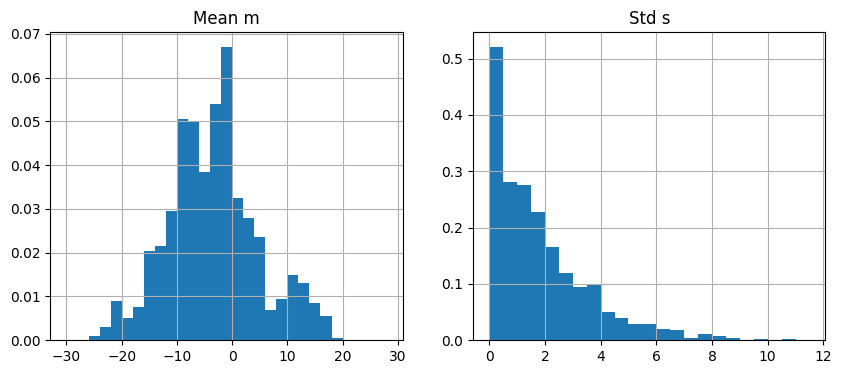

In [12]:
program = """
ProgramName: BasicInference
Indices: n 0 5

m ~ N(0,10)
s ~ Exp(0.5)

x[n] ~ N(m,s)

"""

model = BayesLDM.compile(program) 
samples = model.sample(num_warmup=100, num_samples=1000, b_post_process=True)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(samples['m'], density=True, bins=np.arange(-30,30,2));
plt.grid(True)
plt.title("Mean m")

plt.subplot(1,2,2)
plt.hist(samples['s'], density=True, bins=np.arange(0,12,0.5));
plt.grid(True)
plt.title("Std s")


Next, we condition the same model on the data frame created above. As noted previously the range of the index variable *n* is automatically inferred from the input data frame *df*. We then draw samples from the posterior distribution of the unknown parameters *m* and *s* given the data. As we can see, the posterior mean for *m* is approximately 5, while the posterior mean for *s* is close to 1. The posterior distributions for both parameters are considerably more concentrated compared to the corresponding prior distributions.


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         m      4.68      0.50      4.69      3.78      5.39    287.34      1.01
         s      1.21      0.45      1.10      0.62      1.87    335.27      1.00

Number of divergences: 0


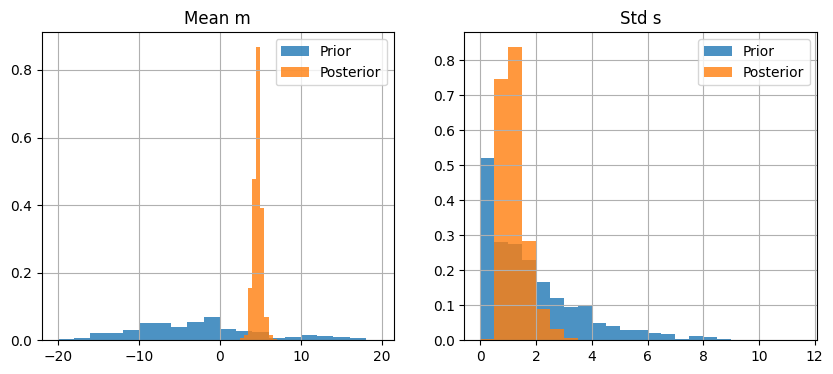

In [13]:
model2 = BayesLDM.compile(program,obs=['x'],data=[df]) 
samples2 = model2.sample(num_warmup=100, num_samples=1000, b_post_process=True)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(samples['m'], density=True, bins=np.arange(-20,20,2),alpha=0.8);
plt.hist(samples2['m'], density=True, bins=np.arange(-20,20,0.5),alpha=0.8);
plt.grid(True)
plt.legend(["Prior","Posterior"])
plt.title("Mean m")

plt.subplot(1,2,2)
plt.hist(samples['s'], density=True,  bins=np.arange(0,12,0.5),alpha=0.8);
plt.hist(samples2['s'],density=True,  bins=np.arange(0,12,0.5),alpha=0.8);
plt.grid(True)
plt.legend(["Prior","Posterior"])
plt.title("Std s")
plt.show()


## 3.2 Conditioning with Multiple Data Frames

BayesLDM supports the use of multiple simulataneous data frames when conditioning. To enale this, each variable used in a model should appear in exactly one data frame, and the indexing used in the data frames must be compatible with that used to define the model. 

The general synatx for conditioning on data from multiple data frames was described in Section 3.1. Below we show an example where two variables are conditioned on ($x$ and $y$), each defined in it's own data frame.

```
model = BayesLDM.compile(program,obs=['x','y'], data=[dfx,dfy])
```



**Example: Conditioning on Multiple Data Frames** In this example we construct an autoregressive model with multi-level exogenous inputs. The data set will consist of data from multiple participants indexed by $n$ and from multiple time points indexed by $t$. We will have one particpant-level covariate $x1[n]$ for each participant $n$ and one time-varying covariate $x2[n,t]$ for each participant and time point. The autoregressive process will be on the variable $y[n,t]$. We will construct one data frame df1 indexed by $n$ only to hold the data for covaraite $x1$, and a second dataframe df2 indexed by both $n$ and $t$ to hold the data for covariate $x2$ and $y$. We begin by generating the data and visualizing the trajectories $y[n,t]$ for all $n$

,x1
n,
0,-0.416758
1,-0.056267
2,-2.136196
3,1.640271
4,-1.793436


x2         y
n t                    
0 0 -0.878108  0.644733
  1 -0.156434 -0.356260
  2  0.256570 -1.462154
  3 -0.988779 -1.531914
1 0 -0.338822  0.311810

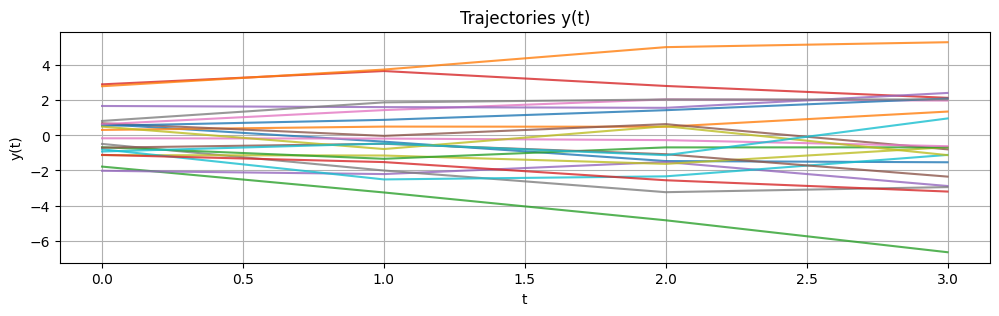

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

N=20
T=4
np.random.seed(2)

true_params={}
true_params["ax1"] = 0.9
true_params["ax2"] = -0.5
true_params["ay"]  = 0.7
true_params["s"]   = 0.5

x1  = np.random.randn(N)
x2  = np.random.randn(N,T)
y   = np.zeros((N,T))
indn = np.zeros((N,T),dtype=int)
indt = np.zeros((N,T),dtype=int)

y[:,0] = true_params["ax1"]*x1 + true_params["ax2"]*x2[:,0] + true_params["s"]*np.random.randn(N)
indn[:,0] = range(N)
indt[:,0] = 0

for t in np.arange(1,T):
  y[:,t]   = true_params["ay"]*y[:,t-1] + true_params["ax1"]*x1 + true_params["ax2"]*x2[:,t] + true_params["s"]*np.random.randn(N)
  indn[:,t] = range(N) 
  indt[:,t] = t

df1 = pd.DataFrame({'n':range(N),'x1':x1})
df1 = df1.set_index(['n'])
df1.name="df1"
display(df1.head(5))

df2 = pd.DataFrame({'n':indn.reshape(-1),'t':indt.reshape(-1),'x2':x2.reshape(-1),'y':y.reshape(-1)})
df2 = df2.set_index(['n','t'])
df2.name="df2"
display(df2.head(5))

plt.figure(figsize=(12,3))
plt.plot(y.T,'-',alpha=0.8)
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Trajectories y(t)")
plt.show()


Next, we construct the corresponding BayesLDM model and run the sampling procedure. 

In [15]:
program = """
ProgramName: MultiDataframeInference
Indices: n 0 19, t 0 3

ax1 ~ N(0,10)
ax2 ~ N(0,10)
ay  ~ N(0,10)
s   ~ Exp(0.1)

x1[n]   ~ N(0,1)
x2[n,t] ~ N(0,1)

y[n,0] ~ N(ax1*x1[n] + ax2*x2[n,0],s)
y[n,t] ~ N(ay*y[n,t-1] + ax1*x1[n] + ax2*x2[n,t],s)

"""

model = BayesLDM.compile(program,obs=["x1","x2","y"], data=[df1,df2]) 
samples = model.sample(b_post_process=True)


                mean       std    median      5.0%     95.0%     n_eff     r_hat
       ax1      0.85      0.09      0.85      0.70      1.00    643.05      1.00
       ax2     -0.46      0.07     -0.46     -0.55     -0.34    894.62      1.00
        ay      0.67      0.06      0.67      0.56      0.77    692.98      1.00
         s      0.59      0.05      0.59      0.52      0.67    904.09      1.00

Number of divergences: 0


Next, we plot the distributions of the model parameters along with the true values of the model parameters. We can see that the posterior models are close to the true values. 

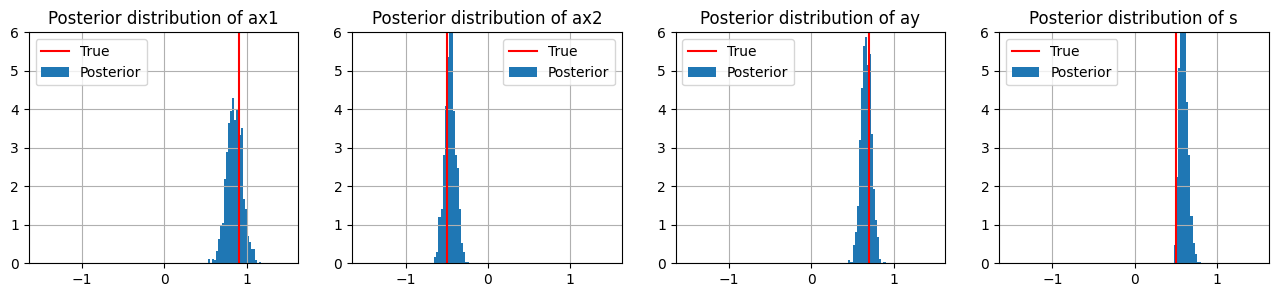

In [16]:
plt.figure(figsize=(16,3))
params=["ax1","ax2","ay","s"]
for i in range(4):
  param = params[i]
  plt.subplot(1,4,i+1)
  plt.hist(samples[param],bins=np.arange(-1.5,1.5, .025),density=True);
  plt.plot([true_params[param]]*2,[0,6],'r-' )
  plt.grid(True)
  plt.ylim(0,6)
  plt.legend(["True","Posterior"])
  plt.title("Posterior distribution of %s"%params[i])

plt.show()

## 3.3 Conditioning and Missing Data

Pandas data frames interpret np.nan values as missing values. BayesLDM follows this same convention. When conditioning a BayesLDM model on a data frame that contains np.nan values, BayesLDM can automatically marginalize over the missing values under the missing at random (MAR) assumption using sampling. 

To do so, the BayesLDM model must specify a full generative model of any variable that has missing values. Missing data values are simply considered additional unknown random variables and the same Bayesain inference procedure that is used to sample unknown parameter values is used to produce a joint posterior distribution over the missing data values and the unknown parameter values. 

If a BayesLDM program already defines a full generative model over all varaibles, it can be applied to a data frame with arbitrary patterns of missing data without any changes. In the next exmple, we construct a data frame with missing values and a BayesLDM model for its generative process. We then perform inference to obtain samples of both the missing data values and unknown parameter values.

**Example: Cross-Lagged Dynamic Model with Missing Data.** In this example, we construct a cross-lagged model on two variables where either or both variables can be missing completely at random at any time step. We define $x[t]\sim N(0.9y[t-1], 0.1)$ and $y[t]\sim N(0.5x[t-1], 0.1)$.
We set the missing data rate to $0.1$. Below, we show the data frame and visualize the sampled data.

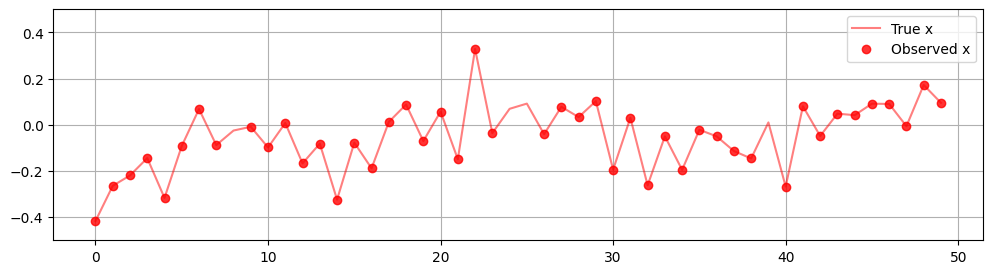

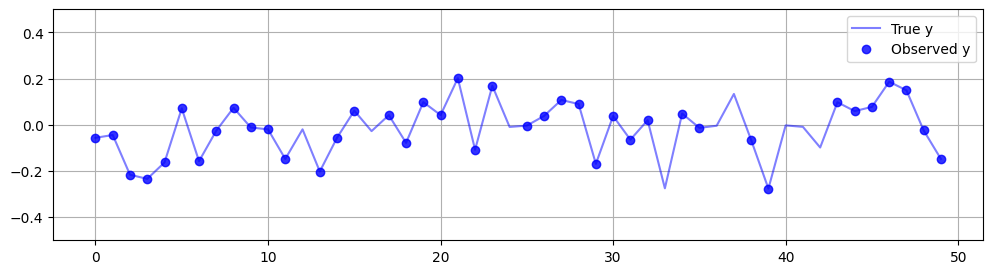

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import copy

T=50
np.random.seed(2)

true_params={}
true_params["axx"] = 0
true_params["axy"] = 0.9
true_params["bx"]  = 0

true_params["ayx"] = 0.5
true_params["ayy"] = 0
true_params["by"]  = 0

true_params["sx"] = 0.1
true_params["sy"] = 0.1

x = np.zeros(T)
y = np.zeros(T)

x[0] = np.random.randn()
y[0] = np.random.randn()

for t in np.arange(1,T):
  x[t] = true_params["axy"]*y[t-1] + true_params["sx"]*np.random.randn()
  y[t] = true_params["ayx"]*x[t-1] + true_params["sy"]*np.random.randn()

ry     = np.random.rand(T)>0.1
y_obs = copy(y)
y_obs[ry==0] = np.nan

rx     = np.random.rand(T)>0.1
x_obs = copy(x)
x_obs[rx==0] = np.nan

df_full = pd.DataFrame({'t':range(T),'x':x,'y':y})
df_full = df_full.set_index('t')

df = pd.DataFrame({'t':range(T),'x':x_obs,'y':y_obs,})
df = df.set_index('t')
df.name="df"

plt.figure(figsize=(12,3))
plt.plot(x,'r-',alpha=0.5)
plt.plot(x_obs,'ro',alpha=0.8)
plt.legend(["True x","Observed x"])
plt.grid(True)
plt.ylim(-0.5,0.5)
plt.show()

plt.figure(figsize=(12,3))
plt.plot(y,'b-',alpha=0.5)
plt.plot(y_obs,'bo',alpha=0.8)
plt.legend(["True y","Observed y"])
plt.grid(True)
plt.ylim(-0.5,0.5)
plt.show()

Next we define the model. We use normal priors on the cross-lag coefficients and exponential priors on the normal standard deviations. 

In [18]:
program = """

ProgramName: CrossLagged
Indices: t 0 49

axy ~ N(0,10)
ayx ~ N(0,10)
sx ~ Exp(0.1)
sy ~ Exp(0.1)

x[0] ~ N(0,1)
y[0] ~ N(0,1)

x[t] ~ N(axy * y[t-1], sx)
y[t] ~ N(ayx * x[t-1], sy)

"""

model = BayesLDM.compile(program, obs=["x","y"], data=[df]) 
samples = model.sample(b_post_process=True)


                mean       std    median      5.0%     95.0%     n_eff     r_hat
       axy      0.91      0.14      0.91      0.69      1.15   1401.89      1.00
       ayx      0.33      0.11      0.32      0.16      0.52   1268.48      1.00
        sx      0.10      0.01      0.10      0.08      0.12   1336.47      1.00
        sy      0.11      0.01      0.11      0.09      0.13   1172.98      1.00
     x[24]      0.14      0.10      0.14     -0.02      0.30   1266.69      1.00
     x[25]      0.02      0.13      0.02     -0.21      0.21    906.45      1.00
     x[39]     -0.04      0.10     -0.05     -0.20      0.11   1708.29      1.00
      x[8]     -0.02      0.10     -0.02     -0.17      0.15   1184.81      1.00
     y[12]     -0.05      0.08     -0.05     -0.17      0.09   1264.46      1.00
     y[16]     -0.01      0.08     -0.01     -0.13      0.12   1522.70      1.00
     y[24]      0.00      0.10      0.01     -0.15      0.17    753.23      1.01
     y[33]     -0.15      0

For a basic diagnostic of the MCMC sampling, we can look at the MCMC summary. This contains the posterior sample statistics and some basic diagnostics: $r\_hat$ and $\mathit{n\_eff}$. We note that $num\_samples$ (default is $1000$) is the number of samples selected for MCMC sampling. 

+ $r\_hat$ is the Split Gelman Rubin diagnostic for a variable. A $r\_hat$ value above 1.1 indicates that the chain has not fully converged. 
A warning message will be displayed for $r\_hat$ > 1.1. When this happens, one suggestion would be to increase $num\_samples$ to run MCMC a little longer.

+ $\mathit{n\_eff}$ is the effective sample size for a variable. It measures the sampling efficiency. There can be autocorrelation in the draws, which results in a lower effective sample size. In general, it is better to have a larger value of $\mathit{n\_eff}$. A value ranging from 10% of $num\_samples$ to around $num\_samples$ should be acceptable. An effective sample size larger than the number of samples indicates that there can be negative autocorrelation in the draws.

Next, we visualize the distributions over the model parameters. We can see that the mean values of the paramters are somewhat close to the true values, but there is substantial uncertainty based on the prior and the available data.

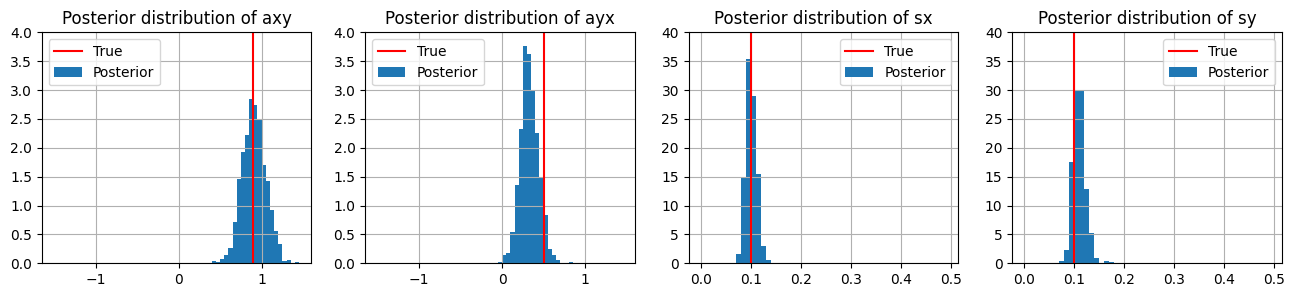

In [19]:
plt.figure(figsize=(16,3))
params=["axy","ayx"]
for i in range(2):
  param = params[i]
  plt.subplot(1,4,i+1)
  plt.hist(samples[param],bins=np.arange(-1.5,1.5, .05),density=True);
  plt.plot([true_params[param]]*2,[0,4],'r-' )
  plt.grid(True)
  plt.ylim(0,4)
  plt.legend(["True","Posterior"])
  plt.title("Posterior distribution of %s"%params[i])
params=["sx","sy"]
for i in range(2):
  param = params[i]
  plt.subplot(1,4,i+3)
  plt.hist(samples[param],bins=np.arange(0,0.5, .01),density=True);
  plt.grid(True)
  plt.title("Posterior distribution of %s"%params[i])
  plt.plot([true_params[param]]*2,[0,40],'r-' )
  plt.grid(True)
  plt.ylim(0,40)
  plt.legend(["True","Posterior"])

plt.show()

## 3.4 Imputation and Statistics of the Missing Data Posterior

While typical models may have a relatively small number of parameters, the underlying data sets used during inference may have many missing values. BayesLDM provides methods for producing different imputations and for producing different posterior statistics specifically for missing data. These methods return pandas data frames of exactly the same type used as input to BayesLDM programs.

Given a model on which the sample() function has already been called, imputations can be obtained using a call to the get_imputed_df() function. The syntax is shown below. The supported methods are "mean", "median", "mode", and "samples." 

```
utils.get_imputed_df(model, [df_name], method=[method_name], sample_indices=[sample_indices])
```
When the mode is "mean", "median" or "mode", a single data frame is returned with missing data values replaced with their posterior mean, median or mode. 
When the mode is "sample," the sample_indices parameter must be a list of one or more sample indices and a dictionary of data frames is returned with the input sample indices as the keys. 

**Example: Mean Imputation for the Cross-Lagged Dynamic Model with Missing Data.** In this example, we continue with the analysis of the cross-lagged dynamic model with missing data by visualizing the distribution of the missing data value. To begin, we plot the time series with the missing data values replaced by their posterior means. For reference, we also show the true values of all data points.

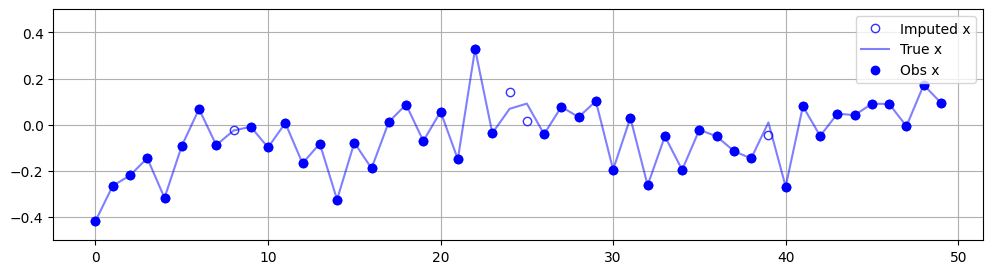

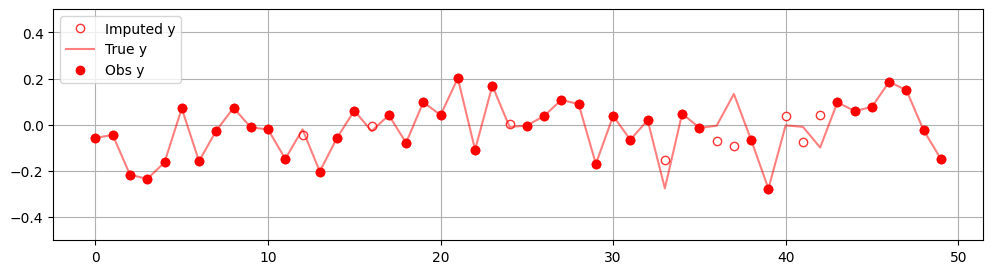

In [20]:
imputed_df = utils.get_imputed_df(model, df, method="mean")

vars=["x","y"]
colors=["b","r"]

for i,var in enumerate(vars):
  plt.figure(figsize=(12,3))

  style = colors[i] + "o" 
  plt.plot(imputed_df[var],style,alpha=0.8,markerfacecolor='w')

  style = colors[i] + "-" 
  plt.plot(df_full[var],style,alpha=0.5)

  style = colors[i] + "o" 
  plt.plot(df[var],style,alpha=1)

  plt.legend(["Imputed "+var,"True "+var,"Obs "+var])
  plt.grid(True)
  plt.ylim(-0.5,0.5)


**Example: Multiple Imputation for the Cross-Lagged Dynamic Model with Missing Data.** A limitation of single imputation methods, such as mean imputation, is that it does not reflect the uncertainty in the posterior distribution over the missing data values. In the plots below, we show a different representation of the posterior as a bundle of sampled trajectories. This representation shows the uncertinaty in the posterior distribution over the missing values. 

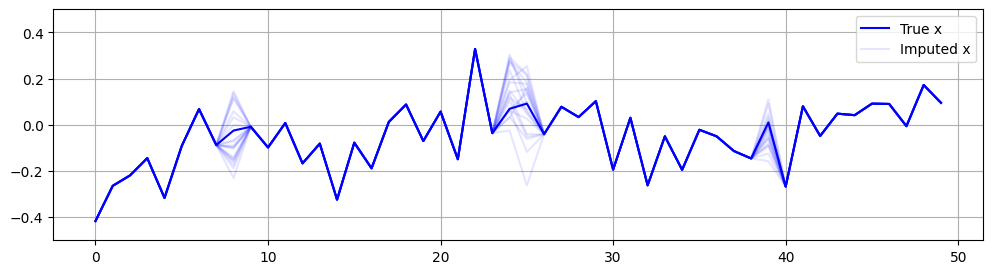

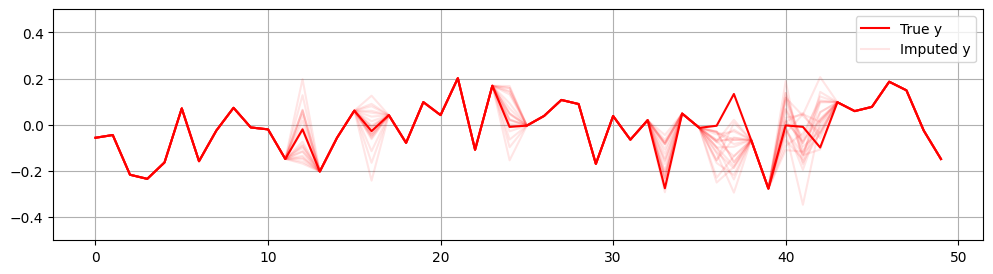

In [21]:
vars=["x","y"]
colors=["b","r"]

for i,var in enumerate(vars):
  plt.figure(figsize=(12,3))

  style = colors[i] + "-" 
  plt.plot(df_full[var],style,alpha=1)

  for j in np.arange(0,1000,50):
    imputed_df = utils.get_imputed_df(model, df, sample_indices=[j])
    style = colors[i] + "-" 
    plt.plot(imputed_df[j][var],style,alpha=0.1,markerfacecolor='w')

  plt.legend(["True "+var,"Imputed "+var])
  plt.grid(True)
  plt.ylim(-0.5,0.5)

**Example: Posterior Statistics and the Cross-Lagged Dynamic Model with Missing Data.** Another way to visualize posterior uncertainty in missing data values is simply to represent missing data values by a mean plus and minus the posterior standard deviation. This can be accomplished using BayesLDM vis the get_df_statistics() function. This fuction takes an input data frame as the first argument, and a posterior statistic name as the second argument. The supported posterior statistics are as follows:

* mean: the posterior mean
* sd: the posterior standard deviation
* p=2.5: the 2.5% point of the posterior
* p=97.5: the 97.5% point of the posterior

The output of the call to the method is a dictionary of data frames of the same structure as the input data frame containing the posterior statistic values. 

To continue the current example, we compute and visualize the posterior standard deviations as error bars on the posterior mean imputations. We use plus/minus two times the posterior standar deviation for the error bar.


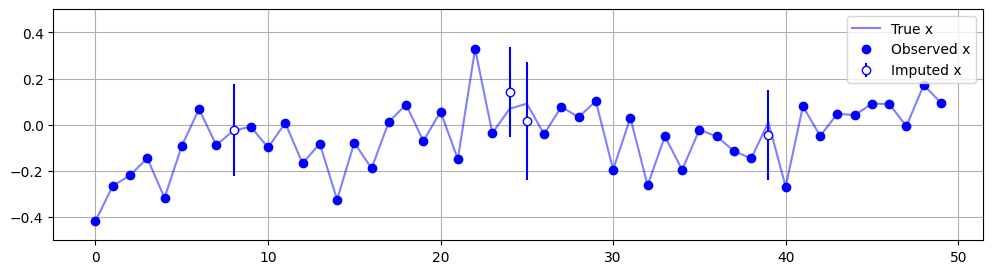

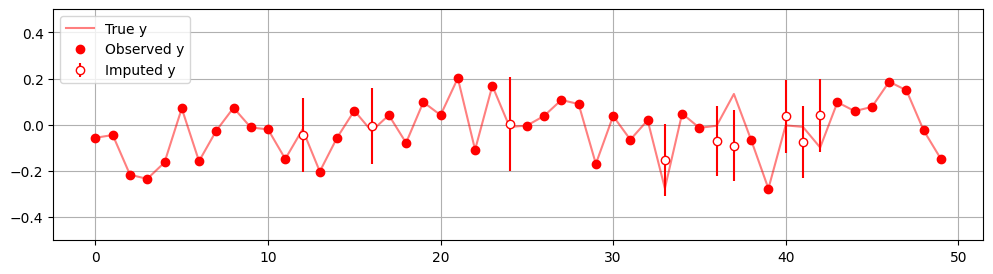

In [22]:
imputed_df = utils.get_imputed_df(model, df, method="mean")
sd_df      = utils.get_df_statistics(model, df, statistics="sd")

vars=["x","y"]
colors=["b","r"]

for i,var in enumerate(vars):
  m = df[var].isna()
  plt.figure(figsize=(12,3))

  style = colors[i] + "-" 
  plt.plot(df_full[var],style,alpha=0.5)

  style = colors[i] + "o" 
  plt.plot(df[var],style)

  style = colors[i] + "o" 
  plt.errorbar(imputed_df.index[m],imputed_df[var][m],yerr=2*sd_df[var][m], fmt=style, alpha=1,markerfacecolor="w")

  plt.legend(["True "+var,"Observed "+var,"Imputed "+var])
  plt.grid(True)
  plt.ylim(-0.5,0.5)


**Example: Re-Analyzing Multiply Imputed Data Frames.** The missing data handling properties of BayesLDM make it well suited for constructing models to use for performing multiple imputation, as described above. One common use case for imputation models is to enable the application of methods that require complete data. 

While BayesLDM can implement many statistical models, in this example we show how the vector autoregressive model from the Statmodels time series analysis package can be applied to re-analyze multiply imputed data output by BayesLDM. We continue to use the cross-lagged dynamic model as an example model. 

To begin, we loop through all 1000 samples and fit the VAR to each imputed data set. The cross-lagged model only includes a subset of the coefficients in the full VAR model. Specifically, the cross-lagged model only includes the coeficcient $axy$ for the influence of $y$ on $x$ and the coefficient $ayx$ for the influence of $x$ on $y$. There are no autoregressive terms on  $x$ and $y$ (e.g., $axx=0$ and $ayy=0$). There are also no contant terms in the model (e.g., $bx=0$ and $by=0$). Since the full VAR model fits all of these cofficients, we extract them all from each fit of the model.


In [23]:
from statsmodels.tsa.api import VAR

axx=[]; axy=[]; ayy=[]; ayx=[]; bx=[]; by=[]

for j in range(1000):
  
  imputed_df = utils.get_imputed_df(model, df, sample_indices=[j])
  var_model = VAR(imputed_df[j])
  results=var_model.fit(1).params

  axx.append(results.loc["L1.x"]["x"])
  axy.append(results.loc["L1.y"]["x"])
  ayx.append(results.loc["L1.x"]["y"])
  ayy.append(results.loc["L1.y"]["y"])
  bx.append(results.loc["const"]["x"])
  by.append(results.loc["const"]["y"])  

var_params={"axx":axx,"axy":axy,"axy":axy,"ayy":ayy,"bx":bx,"by":by}

We note that Statsmodels uses standard maximum likelihood estimation to fit the full VAR model and thus returns the unique parameters that make each imputed data set the most likely. Fitting the VAR model to different imputed data sets obtained from different samples of the BayesLDM model thus passes uncertinaty over the missing data values from the BayesLDM missing data posterior through to the VAR model coefficients fit using Statsmodels. We plot the distribtion over fit VAR coefficient values and compare them to the true cross-lagged model parameter values in the figure below. 

As we can see, the amount of variability is low compared to the full Bayesian analysis of the cross-laged model as it only reflects uncertinaty due to missing data and the missing data rate is relatively low. We can also see that the model parameters $axx$ and $ayy$ that should be exactly $0$ have a small but positive mean under the full VAR model.

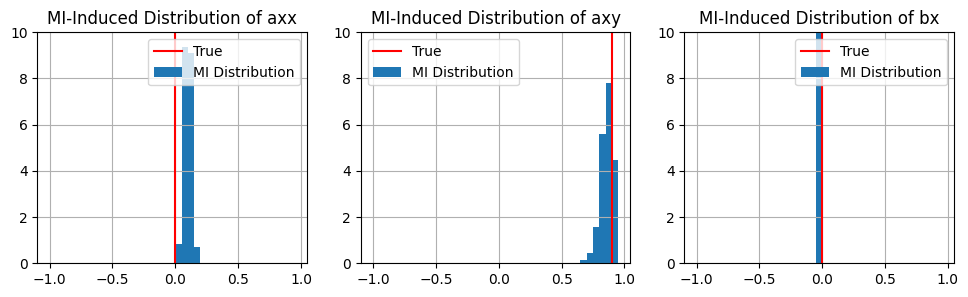

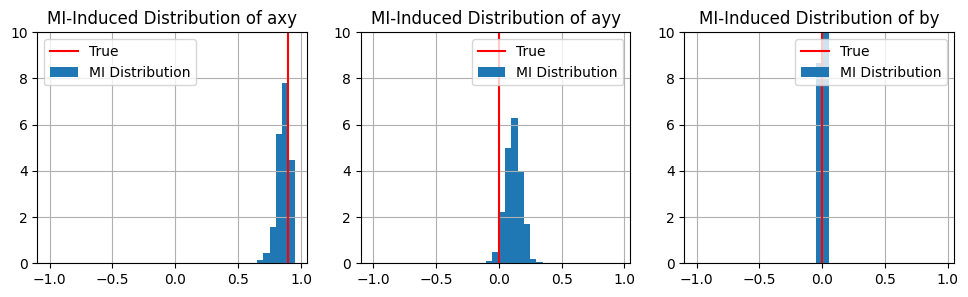

In [24]:
params1=["axx","axy","bx"]
params2=["axy","ayy","by"]
param_sets = [params1,params2]

for p in param_sets:
  p
  plt.figure(figsize=(16,3))
  for i in range(3):
    param = p[i]
    plt.subplot(1,4,i+1)
    plt.hist(var_params[param],bins=np.arange(-1,1, .05),density=True);
    plt.plot([true_params[param]]*2,[0,10],'r-' )
    plt.grid(True)
    plt.ylim(0,10)
    plt.legend(["True","MI Distribution"])
    plt.title("MI-Induced Distribution of %s"%param)


# Section 4. More Modeling Examples

## 4.1 Polynomial Regression

 In this example we construct a one-dimensional polynomial regression model where the *y* values at some *x* values are not observed. We begin by constructing the data frame. We use *n* as the index. The mean relationship between *x* and *y* is chosen to be $E[y|x]=6x^3-4x^2-x+1$. The model has independent observation noise under a normal distribution with standard deviation $0.1$. 

,x,y
n,,
0,0.221993,0.495405
1,0.870732,1.122057
2,0.206719,0.577291
3,0.918611,1.271317
4,0.488411,0.169269


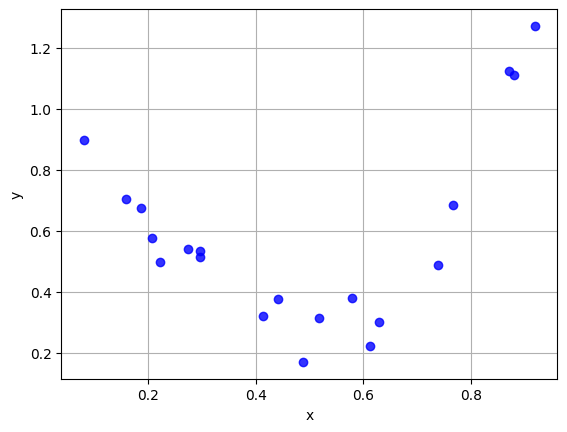

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import copy

N=20
n=range(N)
np.random.seed(5)
x     = np.random.rand(N)
y     = 6*(x**3) -4*(x**2)-x+1 + 0.1*np.random.randn(N)

df = pd.DataFrame({'n':n,'x':x,'y':y})
df = df.set_index('n')
df.name="df"

display(df.head(5))
plt.plot(x,y,'bo',alpha=0.8)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

We now define the model. We place broad normal priors on the coefficients of a third order polynomial regression model and a broad exponential distribution on the noise standard deviation. As we can see, the means of the model coefficients $a[d]$ are only somewhat close to the ground truth values $a[0]=1$, $a[1]=-1$, $a[2]=-4$ and $a[3]=6$. However, we can also see that there is a substantial amount of uncertainty on some coefficients based on the volume of available data. 

In [26]:
program = """
ProgramName: Example1
Indices: n 0 11, d 0 3

a[d] ~ N(0,10)
s    ~ Exp(0.1)

x[n] ~ N(0,1)
y[n] ~ N(a[3]*pow(x[n],3) +a[2]*pow(x[n],2) + a[1]*x[n] + a[0],s)

"""

model = BayesLDM.compile(program,obs=["x","y"], data=[df]) 
samples = model.sample(num_samples=1000, b_post_process=True)


                mean       std    median      5.0%     95.0%     n_eff     r_hat
      a[0]      1.09      0.17      1.09      0.79      1.33    187.11      1.00
      a[1]     -2.42      1.28     -2.41     -4.58     -0.35    178.31      1.00
      a[2]     -0.40      2.77     -0.48     -5.00      3.99    178.48      1.00
      a[3]      3.61      1.80      3.66      0.62      6.53    185.69      1.00
         s      0.09      0.03      0.08      0.05      0.13    129.51      1.01

Number of divergences: 0


We next visualize the posterior distribution for each of the model coefficients $a[d]$. As we can see, the parameter uncertinaty is quite high and the posterior distributions appear to be multimodal.

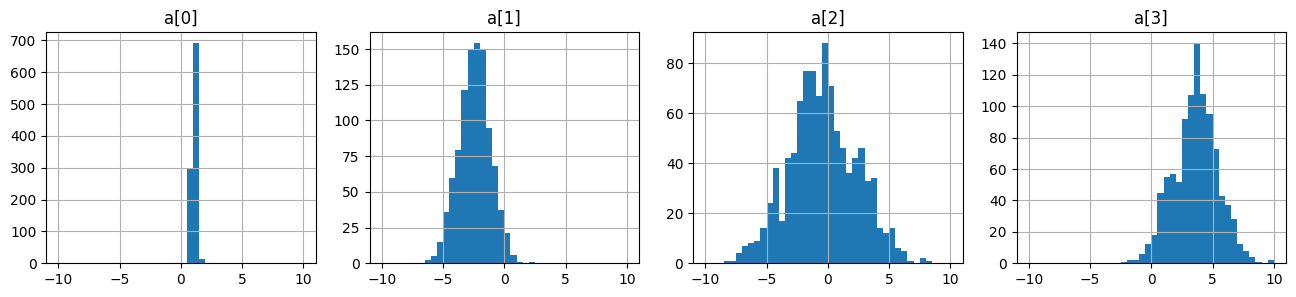

In [27]:
plt.figure(figsize=(16,3))
for d in range(4):
  plt.subplot(1,4,d+1)
  plt.hist([samples["a"][d,:]],bins=np.arange(-10,10.25, .5));
  plt.grid(True)
  plt.title("a[%d]"%d)
plt.show()

A better way to visualize the posterior samples for this model is to plot $E[y|x,a_{s}]$ for multiple sets of sampled coefficient values $a_s$. This visualization shows that the uncertainty in the space of mean functions is very reasonable given the small size of the input data set.

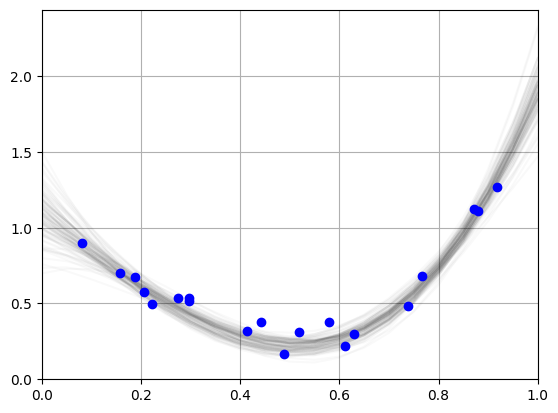

In [28]:
a = samples["a"]
s = samples["s"]
x2 = np.arange(0,1.05,0.05)[:,np.newaxis]
y2 = a[3,:]*pow(x2,3) +a[2,:]*pow(x2,2) + a[1,:]*x2 + a[0,:]

for j in np.arange(0,1000,10):
  #plt.fill_between(x2[:,0],y2[:,j]-s[j],y2[:,j]+s[j],'k',alpha=0.025)
  plt.plot(x2,y2[:,j],'k',alpha=0.025)
plt.grid(True)
plt.plot(x,y,'bo')
plt.xlim(0,1)
plt.show()